<a href="https://colab.research.google.com/github/yunmi099/2022s-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [ ]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



최적의 parameter는 {'p': 1, 'n': 1}이고, 그 때의 score는 0.690 입니다.
test_accuracy : 0.577


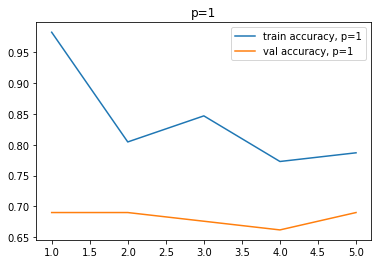

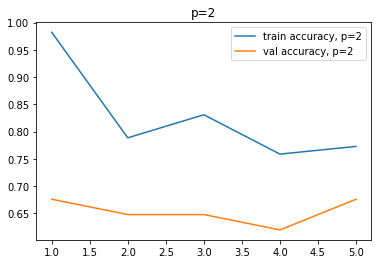

In [ ]:
from numpy.core.fromnumeric import searchsorted
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

neighbors=range(1,6)

train_accuracy=[]
val_accuracy=[]

score_val = 0
for p in range(1,3): # p=1는 manhattan distance이고 p=2는 euclidean distance이다. 
    train_accuracy.clear()
    val_accuracy.clear() # p값이 변화하면 train_accuracy와 val_accuracy를 초기화 한다.

    ax = plt.subplots(1,1)
    for n in neighbors:
        clf = KNeighborsClassifier(n_neighbors=n,p=p) 
        clf.fit(X_train, y_train)  # neighbor의 수에 따라 training data를 학습 시킨다.
        score_model = clf.score(X_train,y_train) 
        train_accuracy.append(score_model) # 파라미터의 따른 training data의 정확도를 score_moldel에 저장하고
                                           # train_accuracy에 추가한다.
        score_val=clf.score(X_val,y_val)
        val_accuracy.append(score_val)   # 파라미터의 따른 validation set으로 산출한 정확도를 
                                        #score_val에 저장하고 val_accuracy에 추가한다.
        if score_val > optimal_score :
          optimal_score = score_val
          optimal_parameters = {'p' : p, 'n' : n} # 거리 척도(p)와 k값(n)에 따라 가장 val_accuracy가 큰 지점을 찾기 위해
                                                  #if문을 이용하여 최적의 파라미터를 갱신시켜준다. 
    plt.title('p={}'.format(p))
    plt.plot(neighbors,train_accuracy,label="train accuracy, p={}".format(p))
    plt.plot(neighbors,val_accuracy, label="val accuracy, p={}".format(p))
    plt.legend(loc='best') # train set의 정확도와 validation set의 정확도를 그래프로 나타낸다.

print('최적의 parameter는 {}이고, 그 때의 score는 {:.3f} 입니다.'.format(optimal_parameters, optimal_score))

clf_test =KNeighborsClassifier(n_neighbors=optimal_parameters['n'],p=optimal_parameters['p']) 
clf_test.fit(X_train,y_train) # 탐색 중 val_accuracy가 가장 컸던 조합을 optimal_parameters 딕셔너리에 넣은 후 그 조합으로 test set을 실행한다. 
print('test_accuracy : {:.3f}'.format(clf_test.score(X_test,y_test))) # test data의 정확도를 출력한다.

**설명 작성**  
- 최적의 파라미터: p=2이고, n = 5 일 때이다.
- 설명: 거리 척도는 euclidean distance를 이용하고, k값은 5를 이용할 때 validation set의 정확도가 가장 높다. 
KNeighbosClassifier에서 p = 1일 때는 manhattan distance로 학습하고,
 p = 2일 때는 euclidean distance로 학습한다. 가장 바깥 쪽 반복 문에서 p값을 변화시켜 학습시키고, 
안쪽 반복문에서 neighbor의 수를 변화시키면서 학습시킨다. 학습하고 training set의 정확도를 training_accuracy에 저장하고
validation set을 이용하여 test한다. best_score에 validation의 정확도인 score_val를 계속 갱신하여 가장 좋은 
성능을 내는 p와 n의 값을 찾아 optimal_parameters 딕션어리에 넣고 test set을 실행한다. 



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


최적의 parameter는 {'kernel': 'rbf', 'C': 1000}이고 , 그때의 score는 0.845이다.
test_accuracy : 0.746


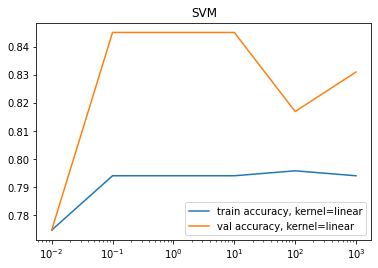

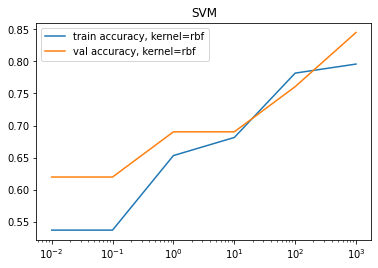

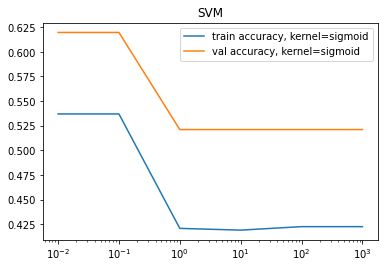

In [ ]:
### 문제 2 ###
## 코드 작성 ##
from sklearn.svm import SVC
import matplotlib.pyplot as plt

param_range= range(1,6)
train_accuracy=[]
val_accuracy=[]


kernel_tricks=['linear','rbf','sigmoid'] # 선형 모델인 linear, 비선형 모델인 rbf,signoid를 이용하여 학습한다.
C=[0.01,0.1,1,10,100,1000]                    # c값을 다르게하여 제약조건의 강도를 조절한다.
for k in kernel_tricks:
    _, ax = plt.subplots(1,1)
    train_accuracy.clear()
    val_accuracy.clear() # 다른 kernel_trick을 이용하면 train_accuracy와 val_accuracy를 초기화 한다.

    for c in C:
        model=SVC(kernel=k,C=c) 
        model.fit(X_train,y_train)       # c 값을 다르게 하면서 traing_set를 학습시킨다.

        train_score = model.score(X_train, y_train)
        train_accuracy.append(train_score) # training set의 정확도를 계산하여 저장한다.
        val_score=model.score(X_val,y_val)
        val_accuracy.append(val_score) # validation set으로 test 하고 정확도를 저장한다.
        if val_score > optimal_score:
            optimal_score=val_score
            optimal_parameters= {'kernel':k, 'C':c} # 최적의 parameter를 best_score에 저장해가며 찾는다.

    plt.plot(C,train_accuracy,label='train accuracy, kernel={}'.format(k))
    plt.plot(C,val_accuracy,label='val accuracy, kernel={}'.format(k)) # train set의 정확도와 validation set의 정확도를 그래프로 나타낸다.

    plt.xscale('log')
    plt.title('SVM')
    plt.legend(loc='best') 

print('최적의 parameter는 {}이고 , 그때의 score는 {:.3f}이다.'.format(optimal_parameters, optimal_score))

model= SVC(kernel=optimal_parameters['kernel'],C=optimal_parameters['C']) # 탐색 중 val_accuracy가 가장 컸던 조합을 optimal_parameters 딕셔너리에 넣은 후 그 조합으로 test set을 실행한다. 
model.fit(X_train,y_train)
test_score = model.score(X_test, y_test)

print('test_accuracy : {:.3f}'.format(test_score)) # test data의 정확도를 출력한다.

**설명 작성**  
- 최적의 파라미터: 최적의 parameter는 rbf, c=1000 일 때 이다. 
- 설명:linear, rbf, sigmoid 중에서 최적의 kernel을 찾기 위해 가장 바깥 for문에서 차례로 학습하도록 하였다.
그 내부에서는 c 값을 변동시켜 training set을 학습하였다. training set의 정확도를 계속 갱신해 나가면서 최적의 kernel과 c값을 찾아내었다. 그 결과 rbf kernel을 이용하고 c값을 1000으로
하였을 때 score가 가장 높았다. 따라서 최적의 파라미터는 rbf와 c = 1000이다. 



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

최적의 parameters는 {'max_depth': 2, 'max_features': 'sqrt'}이고, score는 0.803이다.
test set score : 0.775


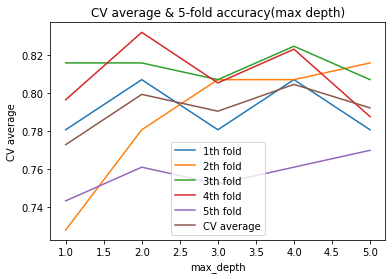

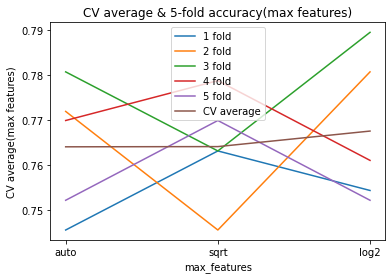

In [19]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

max_depth=list(range(1,6))
max_features= ['auto','sqrt','log2']
mean_score=[]
score_list=[]
ax = plt.subplots(1,1)
train_accuracy=[]
val_accuracy=[]

for d in max_depth: #  tree의 depth에 따른 validation set의 accuacy를 score_list에 저장 하고, score의 평균을 mean_score에 저장한다 .
    train_accuracy.clear();
    val_accuracy.clear();
    clf =RandomForestClassifier(max_depth=d)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    score_list.append(score)
    mean_score.append(score.mean())
            
for k in range(5):
    plt.plot(max_depth, np.array(score_list)[:,k],label='{}th fold'.format(k+1)) 
plt.plot(max_depth,mean_score,label='CV average'.format(k))
plt.xlabel('max_depth')
plt.ylabel('CV average')
plt.title('CV average & 5-fold accuracy(max depth)')
plt.legend(loc='best')  #  tree의 depth에 따라, K-fold CV를 통해서 나온 평균 정확도와 각 fold의 정확도들을 
                        # x 축은 max_depth , y축은 CV average로 하여 그린다. 

ax = plt.subplots(1,1)
mean_score.clear()
score_list.clear() # mean_score, score_list를 초기화 한다. 

for m in max_features: #  max_feature에 따른 validation set의 accuacy를 score_list에 저장 하고, score의 평균을 mean_score에 저장한다 .
    train_accuracy.clear();
    val_accuracy.clear();
    clf=RandomForestClassifier(max_features=m)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    score_list.append(score)
    mean_score.append(score.mean())

for k in range(5):
    plt.plot(max_features,np.array(score_list)[:,k],label='{} fold'.format(k+1))
plt.plot(max_features,mean_score,label='CV average'.format(k))
plt.xlabel('max_features') 
plt.ylabel('CV average(max features)')
plt.title('CV average & 5-fold accuracy(max features)')
plt.legend(loc='best') #  max_feature 에 따라, K-fold CV를 통해서 나온 평균 정확도와 각 fold의 정확도들을 
                      # x 축은 max_depth , y축은 CV average로 하여 그린다. 

#두 파라미터의 조합을 통해 최적의 파라미터를 찾기 위해 grid search를 이용한다. 

grid_parameters ={'max_depth' : max_depth, 'max_features' : max_features}
clf =RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=grid_parameters, cv=5, refit=True)
#cv=5를 통해 5-fold를 설정하고. refit=True를 통해 90%의 학습데이터 다시 학습할 수 있도록 한다. 
grid_search.fit(X_train,y_train)
print('최적의 parameters는 {}이고, score는 {:.3f}이다.'.format(grid_search.best_params_, grid_search.best_score_))
# 최적의 파라미터를 출력한다.
test_score=grid_search.score(X_test,y_test)
print("test set score : {:.3f}".format(test_score))
# cross validation의 결과로 결정한 최적의 파라미터를 이용하여 학습된 최종 모델에 테스트 데이터로 테스트 한다.

**설명 작성**  
- test accuracy: 0.775
- 최적의 파라미터: max_depth = 2 , max_features : sqrt
- 설명: 두 파라미터의 조합을 통해 최적의 파라미터를 찾기 위해 grid search를 이용하였고, cv=5를 통해 5-fold를 설정하고. refit=True를 통해 90%의 학습데이터 다시 학습하였다. 그 결과 max_depth = 2, max_features은 sqrt로 최적의 파라미터를 찾을 수 있었다. cross validation의 결과로 결정한 최적의 파라미터를 이용하여 학습된 최종 모델에 테스트 데이터로 테스트 하면 0.775의 test accuracy를 얻을 수 있다. 



최적의 parameters는 {'max_depth': 4, 'max_features': 'sqrt'}이고, score는 0.810이다.
test set score : 0.775


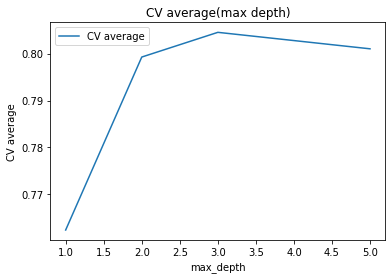

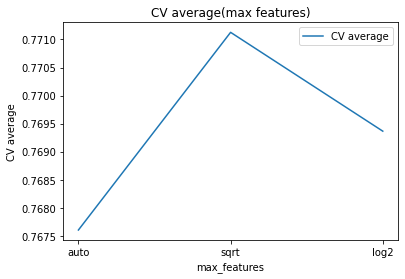

In [ ]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

max_depth=list(range(1,6))
max_features= mf=['auto','sqrt','log2']
mean_score=[]
score_list=[]
ax = plt.subplots(1,1)
loo = LeaveOneOut()
train_accuracy=[]
val_accuracy=[] 

for d in max_depth:  #  tree의 depth에 따른 validation set의 accuacy를 score_list에 저장 하고, score의 평균을 mean_score에 저장핝다 
    train_accuracy.clear();
    val_accuracy.clear();
    clf =RandomForestClassifier(max_depth=d)
    score = cross_val_score(clf, X_train, y_train, cv=loo, scoring="accuracy")
    score_list.append(score)
    mean_score.append(score.mean()) 

 #  tree의 depth에 따라, leave one out CV를 통해서 나온 평균 정확도를 
 # x 축은 max_depth , y축은 CV average로 하여 그린다. 

plt.plot(max_depth,mean_score,label='CV average')
plt.xlabel('max_depth')
plt.ylabel('CV average')
plt.title('CV average(max depth)')
plt.legend(loc='best') 

ax = plt.subplots(1,1)
mean_score.clear()
score_list.clear() # mean_score, score_list를 초기화 한다

for m in max_features:  #  max_feature에 따른 validation set의 accuacy를 score_list에 저장 하고, score의 평균을 mean_score에 저장한다 .
    train_accuracy.clear();
    val_accuracy.clear();
    clf=RandomForestClassifier(max_features=m)
    score = cross_val_score(clf, X_train, y_train, cv=loo, scoring="accuracy")
    score_list.append(score)
    mean_score.append(score.mean())

 #  tree의 depth에 따라, leave one out CV를 통해서 나온 평균 정확도를
 # x 축은 max_features , y축은 CV average로 하여 그린다.. 

plt.plot(max_features,mean_score,label='CV average')
plt.xlabel('max_features')
plt.ylabel('CV average')
plt.title('CV average(max features)')
plt.legend(loc='best')

#이를 위해 grid search를 이용한다.#두 파라미터의 조합을 통해 최적의 파라미터를 찾기 위해 grid search를 이용한다.

grid_parameters ={'max_depth' : max_depth, 'max_features' : max_features}
clf =RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=grid_parameters, cv=loo, refit=True)
#cv=loo를 통해 leaveOneOut을 통해 테스트함을 설정하고. refit=True를 통해 90%의 학습데이터 다시 학습할 수 있도록 한다. 
grid_search.fit(X_train,y_train)
print('최적의 parameters는 {}이고, score는 {:.3f}이다.'.format(grid_search.best_params_, grid_search.best_score_))
test_score=grid_search.score(X_test,y_test)
print("test set score : {:.3f}".format(test_score))
# cross validation의 결과로 결정한 최적의 파라미터를 이용하여 학습된 최종 모델에 테스트 데이터로 테스트 한다.

**설명 작성**  
- test accuracy: 0.775
- 최적의 파라미터: max_depth = 4, max_features = sqrt
- 설명: 두 파라미터의 조합을 통해 최적의 파라미터를 찾기 위해 grid search를 이용하였고, loo = LeaveOneOut(), cv=loo를 통해 LeaveOndeOut을 설정하고. refit=True를 통해 90%의 학습데이터 다시 학습하였다. 그 결과 max_depth = 4, max_features은 sqrt로 최적의 파라미터를 찾을 수 있었다. cross validation의 결과로 결정한 최적의 파라미터를 이용하여 학습된 최종 모델에 테스트 데이터로 테스트 하면 0.775의 test accuracy를 얻을 수 있다. 




---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

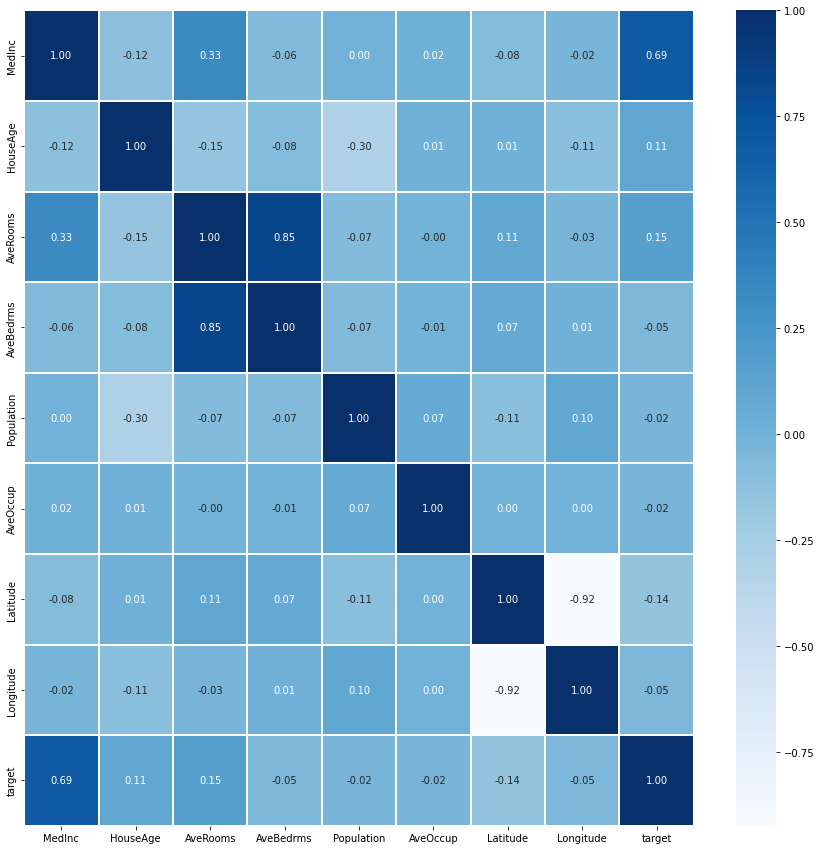

In [ ]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=1, cmap='Blues') # 파란 계열로 소수점 둘 째 자리까지 heat map  그리기 

- **Feature들 간 관계 서술**  
  답:
(target과의 관계)
MedInc : 0.69 -> positive linear correlation 

HouseAge : 0.11 ->  positive linear correlation

AveRooms : 0.15 -> positive linear correlation

AveBedrms : -0.05 -> no linear correlation (0에 거의 가까우므로)

Population : -0.02 ->  no linear correlation (0에 거의 가까우므로)

AveOccup : 0.00 -> no linear correlation

Latitude : -0.14 -> negative linear correlation

Longitude : -0.05 ->  no linear correlation (0에 거의 가까우므로)


( 유의미한 관계 ) 
MedInc - target : 0.69 -> positive linear correlation 

AveRooms - MedInc : 0.33 -> positive linear correlation 

AveRooms - AveBedrms : 0.85 -> positive linear correlation 

- **최종 선택한 feature들**  
  답: MedInc, HouseAge,AveRooms,Latitude

In [ ]:
### 문제 4-1 ###
# 새 dataframe 만들기 
from sklearn.model_selection import train_test_split
df.drop(['AveBedrms','Population','AveOccup','Longitude'],axis = 1, inplace=True) #최종 선택한 feauture를 제외하고 drop을 이용하여 columns 삭제하기 


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [ ]:
### 문제 4-2 ###
## 코드 작성 ##

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

X = df.drop('target', axis=1)
y = df['target']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # train data와 test data의 비율을 9:1로 하여 나눈다. 

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # LinearRegression을 통해 training set을 학습하고 모델을 예측하여 y_pred에 저장한다. 

print('Mean Square Error(MSE)=',mean_squared_error(y_test, y_pred).round(3))
print('r2 score=', r2_score(y_test, y_pred).round(3)) # MSE와 r2 score을 계산한다. 

Mean Square Error(MSE)= 0.576
r2 score= 0.583


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: r2 score은 0에서 1사이의 값을 가지고, 1은 완벽히 데이터에 fit하는 것을 의미하므로 1에 가까울 수록 overfitting, 0에 가까울 수록 underfitting 한다고 볼 수 있다. prediction 결과 0.583으로 1에 가까우므로 약간 overfit 하다고 볼 수 있다. 

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9) #train : validation : test 데이터셋의 비율을 8:1:1로 하여 나눈다.

alpha = [0.0001, 0.001,0.01,0.1,10]
val_score_Ridge =[]
val_score_Lasso = []
optimal_score_R = 0
optimal_score_L = 0
for a in alpha:
  clf_R = Ridge(alpha=a).fit(X_train, y_train)
  train_score = clf_R.score(X_train, y_train) # training set을 Ridge regression model로 학습한다.
  val_score_R = clf_R.score(X_val,y_val) 
  val_score_Ridge.append(val_score_R) # validation set으로 test하고 그 score를 val_score_Ridge에 저장한다.
  if val_score_R > optimal_score_R:
    optimal_score_R=val_score_R 
    optimal_parameters_R= {'alpha':a} # 더 높은 score가 나오는 val_score을 optimal_score_R에 업데이트 하고 그 때의 alpha 값을 optimal_parameter_R에 저장한다.

  clf_L = Lasso(alpha=a).fit(X_train, y_train) # training set을 Lasso regression model로 학습한다.
  train_score_L = clf_L.score(X_train, y_train)
  val_score_L = clf_L.score(X_val,y_val)
  val_score_Lasso.append(val_score_L) # validation set으로 test하고 그 score를 val_score_Lasso에 저장한다.

  if val_score_L > optimal_score_L:
    optimal_score_L=val_score_L
    optimal_parameters_L= {'alpha':a} # 더 높은 score가 나오는 val_score을 optimal_score_L에 업데이트 하고 그 때의 alpha 값을 optimal_parameter_L에 저장한다.
print('Rridge regression 모델 최적의 alpha 값: {}.'.format(optimal_parameters_R))
print('Lasso regression 모델 최적의 alpha 값: {}.'.format(optimal_parameters_L)) # 최적의 alpha 값을 출력한다.


Rridge regression 모델 최적의 alpha 값: {'alpha': 10}.
Lasso regression 모델 최적의 alpha 값: {'alpha': 0.1}.


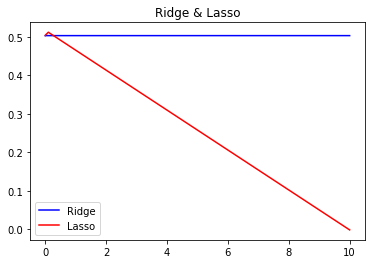

In [ ]:
### 문제 4-3 ###
## 그래프 작성 ##
_, ax = plt.subplots(1,1)

plt.title('Ridge & Lasso')
plt.plot(alpha,val_score_Ridge,label="Ridge",color='blue')
plt.plot(alpha,val_score_Lasso, label="Lasso",color='red')
plt.legend(loc='best') # Ridge 모델을 파란색으로, Lasso 모델을 빨간색으로 하여 그래프를 그린다.


- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.01

In [ ]:
### 문제 4-3 ###
# 최종 결과 출력
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score

model_R = Ridge(alpha=0.10)
model_R.fit(X_train, y_train)
test_score_R = model_R.score(X_test, y_test)
print('test_accuracy : {:.3f}'.format(test_score_R)) # test_set으로 test하여 Ridge regression의 test_score을 출력한다.

model_L = Lasso(alpha=0.1)
model_L.fit(X_train, y_train)
test_score_L = model_L.score(X_test, y_test)
print('test_accuracy : {:.3f}'.format(test_score_L))# test_set으로 test하여 Lasso regression의 test_score을 출력한다.



test_accuracy : 0.518
test_accuracy : 0.514
